In [4]:
%pip install matplotlib requests pandas scipy statsmodels


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 730.2 kB/s eta 0:00:13
   -- ------------------------------------- 0.5/9.9 MB 730.2 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/9.9 MB 699.0 kB/s eta 0:00:13
   ---- ----------------------------------- 1.0/9.9 MB 751.1 kB/s eta 0:00:12
   ----- ---------------------------------- 1.3/9.9 MB 737.4 kB/s eta 0:00:12
   ----- ---------------------------------- 1.3/9.9 MB 737.4 kB/s eta 0:00:12
   ------ --------------------------------- 1.6/9.9 MB 710.8 kB/s eta 0:00:12
   ------ --------------------------------- 1.6/9.9 MB 710.8 kB/s eta 0:00:12
   ------- -------------------------------- 1.8/9.9 MB 662.3 kB/s eta 0:00:13
   -------- ----------

Python Libraries

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
import statsmodels.api as sm

In [2]:
def get_ethereum_data():
    # Define the base URL for the CoinGecko API
    base_url = "https://api.coingecko.com/api/v3"
    
    # Get current timestamp for the 'to' parameter
    end_date = int(datetime.datetime.now().timestamp())
    
    # Get timestamp for 30 days ago for the 'from' parameter
    start_date = int((datetime.datetime.now() - datetime.timedelta(days=30)).timestamp())
    
    # Endpoint for getting Ethereum's market chart data (prices and volumes)
    url = f"{base_url}/coins/ethereum/market_chart/range?vs_currency=usd&from={start_date}&to={end_date}"
    
    # Make the request to the CoinGecko API
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        
        # Prepare lists to store the data
        timestamps = []
        prices = []
        volumes = []
        
        # Process and store the data
        for i in range(len(data['prices'])):
            timestamp = data['prices'][i][0] / 1000  # Convert ms timestamp to seconds
            date = datetime.datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d')
            price = data['prices'][i][1]
            volume = data['total_volumes'][i][1]
            
            timestamps.append(date)
            prices.append(price)
            volumes.append(volume)
        
        # Create a DataFrame
        df = pd.DataFrame({
            'Date': timestamps,
            'Price': prices,
            'Volume': volumes
        })
        
        return df
    else:
        print(f"Error fetching data from CoinGecko API: {response.status_code}")

In [3]:
# Example: Fetch the first 10 Ethereum transactional data i.e., Price and Volume
transaction_data = get_ethereum_data()
transaction_data

,Date,Price,Volume
0,2024-10-15,2661.786216,1.965807e+10
1,2024-10-15,2562.429365,1.978650e+10
2,2024-10-15,2586.534484,1.865791e+10
3,2024-10-15,2592.031112,2.114254e+10
4,2024-10-15,2590.483536,2.111182e+10
...,...,...,...
715,2024-11-14,3204.751549,5.929675e+10
716,2024-11-14,3209.832086,5.974423e+10
717,2024-11-14,3193.446176,5.988718e+10
718,2024-11-14,3185.999223,5.708326e+10


In [4]:
df = pd.DataFrame(transaction_data)
# Display the transactions dataframe
df.head()

,Date,Price,Volume
0,2024-10-15,2661.786216,1.965807e+10
1,2024-10-15,2562.429365,1.978650e+10
2,2024-10-15,2586.534484,1.865791e+10
3,2024-10-15,2592.031112,2.114254e+10
4,2024-10-15,2590.483536,2.111182e+10


![Demand Curve](Adobe_Scan_Nov_14_2024_1.jpg "Demand Curve illustration")

In [5]:
"OLS Regression"
def perform_regression(df):
    # Log transform the Price and Volume
    df['Log_Price'] = df['Price']
    #df['Log_Price'] = np.log(df['Price'])
    df['Log_Volume'] = df['Volume']
    #df['Log_Volume'] = np.log(df['Volume'])
    
    # Define the independent variable (Log_Volume) and add a constant
    X = sm.add_constant(df['Log_Volume'])
    
    # Define the dependent variable (Log_Price)
    y = df['Log_Price']
    
    # Perform the regression
    model = sm.OLS(y, X).fit()
    
    # Print the regression results
    print(model.summary())
    
    return model,X,y
# Fetch Ethereum data

if df is not None:
    # Perform regression analysis
    model,X,y = perform_regression(df)


                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     2145.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          7.32e-218
Time:                        16:19:53   Log-Likelihood:                -4529.1
No. Observations:                 720   AIC:                             9062.
Df Residuals:                     718   BIC:                             9071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2337.2280      9.277    251.949      0.0

Demand Curve Plot

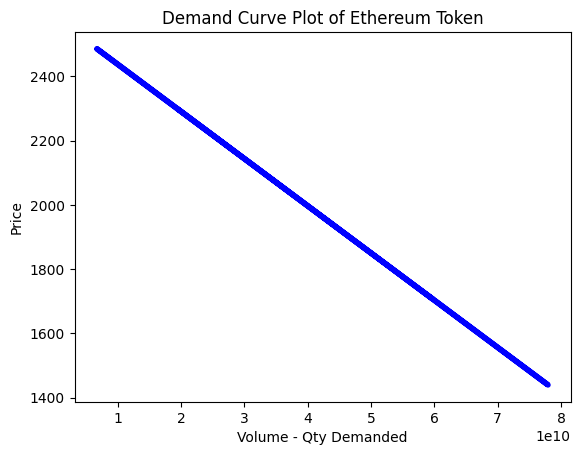

In [7]:
#plt.scatter(X['Log_Volume'],y)
y_model= (2336+248.740)-1.469e-08*X['Log_Volume']

#y_model= 4.8210 + 0.1293*X['Log_Volume']
fig=plt.plot(X['Log_Volume'],y_model,lw=4,c='blue',label="OLS Regression")
plt.title("Demand Curve Plot of Ethereum Token")
plt.xlabel("Volume - Qty Demanded")
plt.ylabel("Price")
plt.show()